In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report,
                             confusion_matrix)

In [2]:
X_M = np.arange(10)
X = X_M.reshape(-1, 1)
y = np.array([*[0] * 5, *[1] * 5])

In [3]:
model = LogisticRegression(solver="liblinear", random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [4]:
model.coef_

array([[0.4108015]])

In [5]:
model.intercept_

array([-1.20162483])

In [6]:
model.predict_proba(X)

array([[0.76881371, 0.23118629],
       [0.68800809, 0.31199191],
       [0.59387837, 0.40612163],
       [0.49230569, 0.50769431],
       [0.39136427, 0.60863573],
       [0.29893328, 0.70106672],
       [0.22042624, 0.77957376],
       [0.15789351, 0.84210649],
       [0.11058424, 0.88941576],
       [0.07616801, 0.92383199]])

In [7]:
model.predict(X)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [8]:
logit = (X * model.coef_ + model.intercept_).ravel()
loss = expit(X * model.coef_ + model.intercept_).ravel()

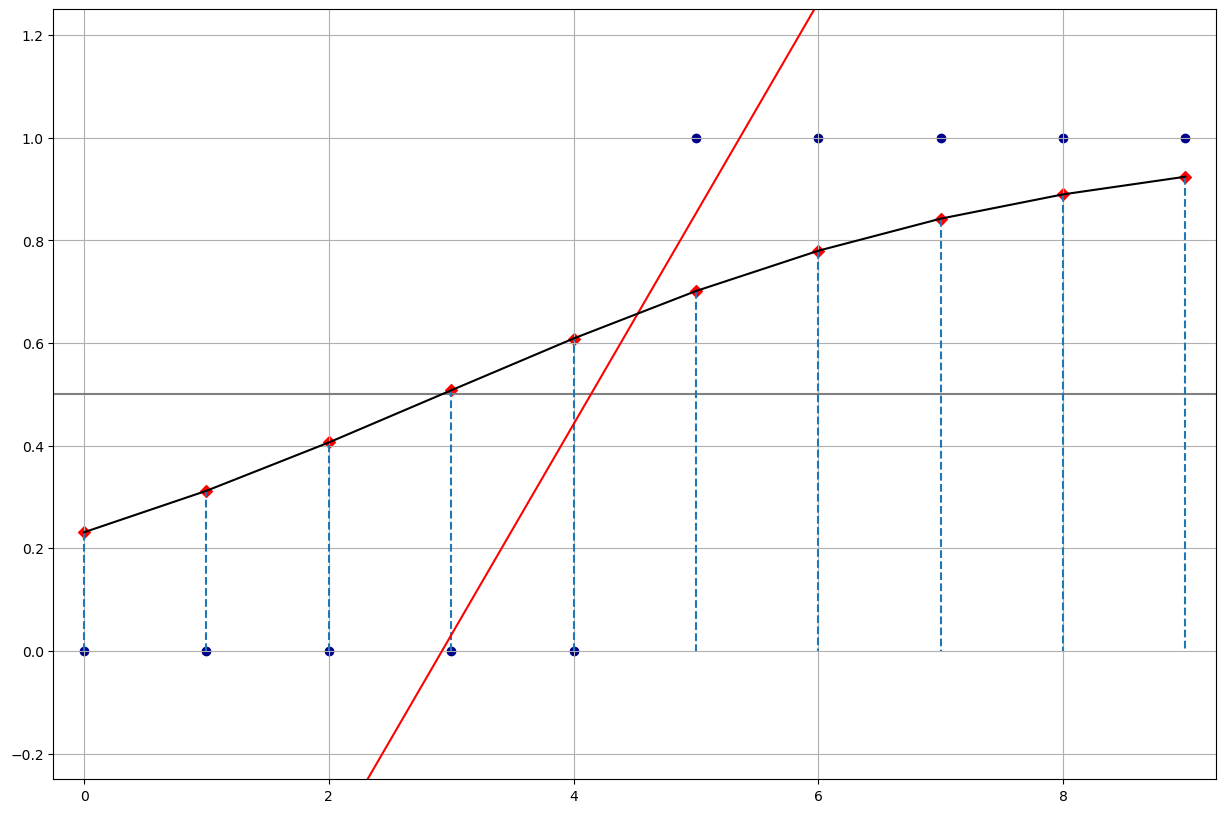

In [9]:
fig, axes = plt.subplots(figsize=(15, 10))
plt.xlim(-.25, 9.25)
plt.ylim(-.25, 1.25)
plt.scatter(X, y, color="darkblue")
plt.axhline(.5, color=".5")
for _ in range(5, 10):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + loss[_]) / 1.5,
        ymax=(.25 + .0) / 1.5
    )

for _ in range(5):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + .0) / 1.5,
        ymax=(.25 + loss[_]) / 1.5
    )

plt.plot(X, logit, color="red")
plt.scatter(X, loss, marker="D", color="red")
plt.plot(X, loss, color="black")
plt.grid()

In [10]:
model.score(X, y)

0.8

In [11]:
cm = confusion_matrix(y, model.predict(X))
cm

array([[3, 2],
       [0, 5]])

In [12]:
classification_report(y, model.predict(X))

'              precision    recall  f1-score   support\n\n           0       1.00      0.60      0.75         5\n           1       0.71      1.00      0.83         5\n\n    accuracy                           0.80        10\n   macro avg       0.86      0.80      0.79        10\nweighted avg       0.86      0.80      0.79        10\n'

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

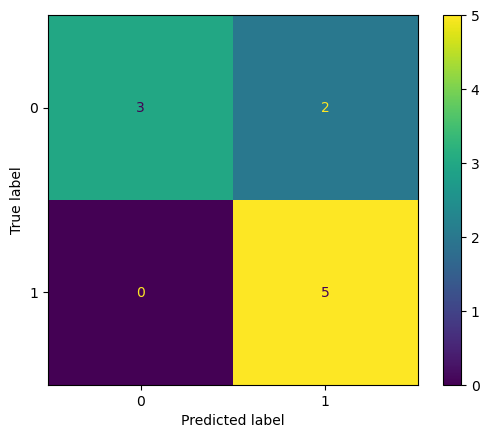

In [14]:
disp.plot()

In [15]:
model = LogisticRegression(solver="liblinear", C=9., random_state=0)
model.fit(X, y)

LogisticRegression(C=9.0, random_state=0, solver='liblinear')

In [16]:
model.coef_

array([[0.91213864]])

In [17]:
model.intercept_

array([-3.71965528])

In [18]:
model.predict_proba(X)

array([[0.97633146, 0.02366854],
       [0.94308066, 0.05691934],
       [0.86936751, 0.13063249],
       [0.7277505 , 0.2722495 ],
       [0.5177677 , 0.4822323 ],
       [0.30131623, 0.69868377],
       [0.14764699, 0.85235301],
       [0.06505132, 0.93494868],
       [0.02718698, 0.97281302],
       [0.01110061, 0.98889939]])

In [19]:
model.predict(X)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [20]:
logit = (X * model.coef_ + model.intercept_).ravel()
loss = expit(X * model.coef_ + model.intercept_).ravel()

In [21]:
model.score(X, y)

1.0

In [22]:
confusion_matrix(y, model.predict(X))

array([[5, 0],
       [0, 5]])

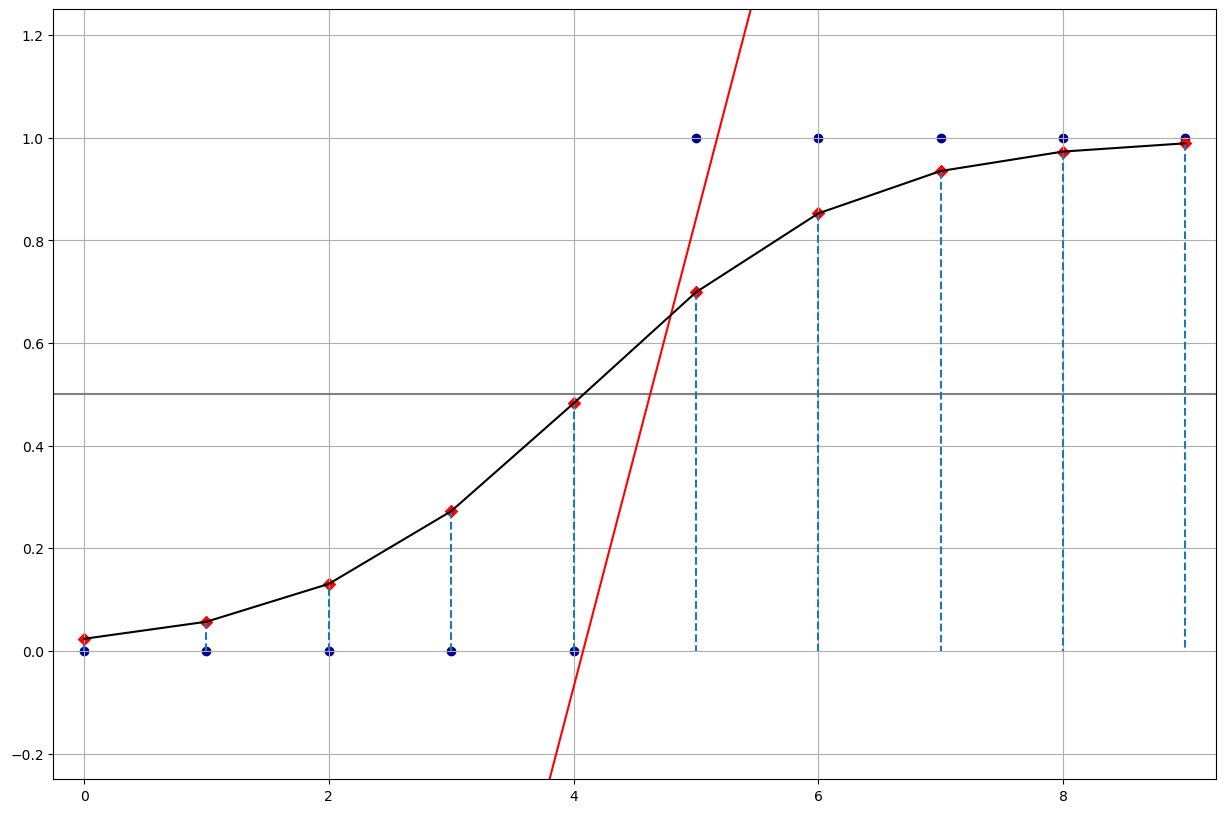

In [23]:
fig, _ = plt.subplots(figsize=(15, 10))
plt.xlim(-.25, 9.25)
plt.ylim(-.25, 1.25)
plt.scatter(X, y, color="darkblue")
plt.axhline(.5, color=".5")
for _ in range(5, 10):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + loss[_]) / 1.5,
        ymax=(.25 + .0) / 1.5
    )

for _ in range(5):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + .0) / 1.5,
        ymax=(.25 + loss[_]) / 1.5
    )

plt.plot(X, logit, color="red")
plt.scatter(X, loss, marker="D", color="red")
plt.plot(X, loss, color="black")
plt.grid()

In [24]:
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, *[1] * 6])
model = LogisticRegression(solver="liblinear", C=10., random_state=0)
model.fit(X, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [25]:
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [26]:
print("Intercept:", model.intercept_)
print("Coef:", model.coef_, end="\n\n")
print("p_pred:", p_pred, sep="\n", end="\n\n")
print("y_pred:", y_pred, end="\n\n")

Intercept: [-1.51632619]
Coef: [[0.703457]]

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

y_pred: [0 0 0 1 1 1 1 1 1 1]



In [27]:
score_

0.8

In [28]:
cm = confusion_matrix(y, model.predict(X))
cm

array([[2, 1],
       [1, 6]])

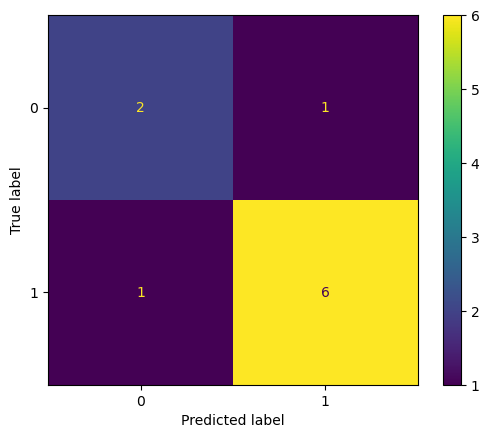

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [30]:
logit = (X * model.coef_ + model.intercept_).ravel()
loss = expit(X * model.coef_ + model.intercept_).ravel()

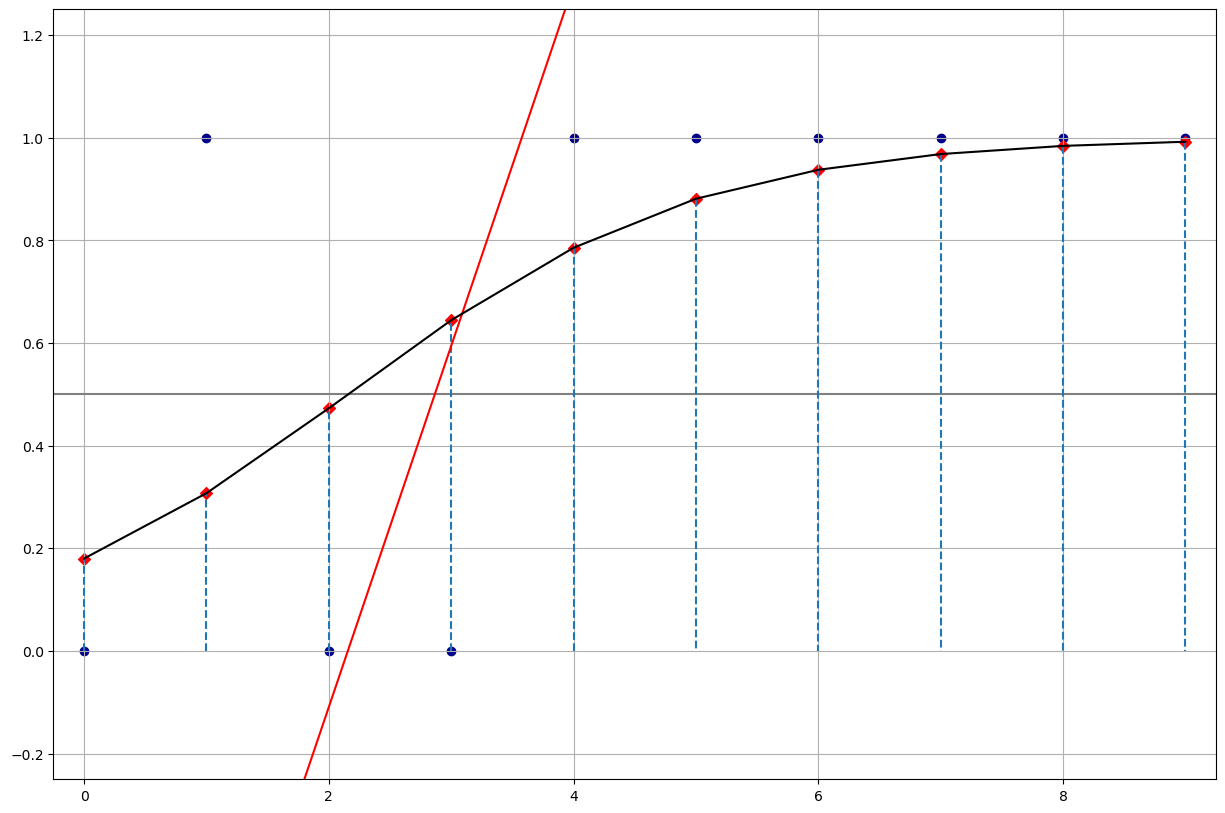

In [31]:
fig, _ = plt.subplots(figsize=(15, 10))
plt.xlim(-.25, 9.25)
plt.ylim(-.25, 1.25)
plt.scatter(X, y, color="darkblue")
plt.axhline(.5, color=".5")
for _ in range(5, 10):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + loss[_]) / 1.5,
        ymax=(.25 + .0) / 1.5
    )

for _ in range(5):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + .0) / 1.5,
        ymax=(.25 + loss[_]) / 1.5
    )

plt.plot(X, logit, color="red")
plt.scatter(X, loss, marker="D", color="red")
plt.plot(X, loss, color="black")
plt.grid()

In [32]:
import statsmodels.api as sm

In [33]:
X = sm.add_constant(np.arange(10).reshape(-1, 1)) # Adds Column with Constants
y = np.array([0, 1, 0, 0, *[1] * 6])
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [34]:
model = sm.Logit(y, X)

In [35]:
result = model.fit(method="newton")
result.params

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


array([-1.972805  ,  0.82240094])

In [36]:
result.predict(X)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [37]:
(result.predict(X) > .5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [38]:
logit = (X * result.params[0] + result.params[1]).ravel()
loss = expit(X * result.params[0] + result.params[1]).ravel()

In [39]:
logit

array([ -1.15040407,   0.82240094,  -1.15040407,  -1.15040407,
        -1.15040407,  -3.12320907,  -1.15040407,  -5.09601407,
        -1.15040407,  -7.06881908,  -1.15040407,  -9.04162408,
        -1.15040407, -11.01442908,  -1.15040407, -12.98723408,
        -1.15040407, -14.96003909,  -1.15040407, -16.93284409])

In [40]:
loss

array([2.40415286e-01, 6.94745754e-01, 2.40415286e-01, 2.40415286e-01,
       2.40415286e-01, 4.21599909e-02, 2.40415286e-01, 6.08385638e-03,
       2.40415286e-01, 8.50513774e-04, 2.40415286e-01, 1.18364413e-04,
       2.40415286e-01, 1.64621699e-05, 2.40415286e-01, 2.28936431e-06,
       2.40415286e-01, 3.18373885e-07, 2.40415286e-01, 4.42750673e-08])

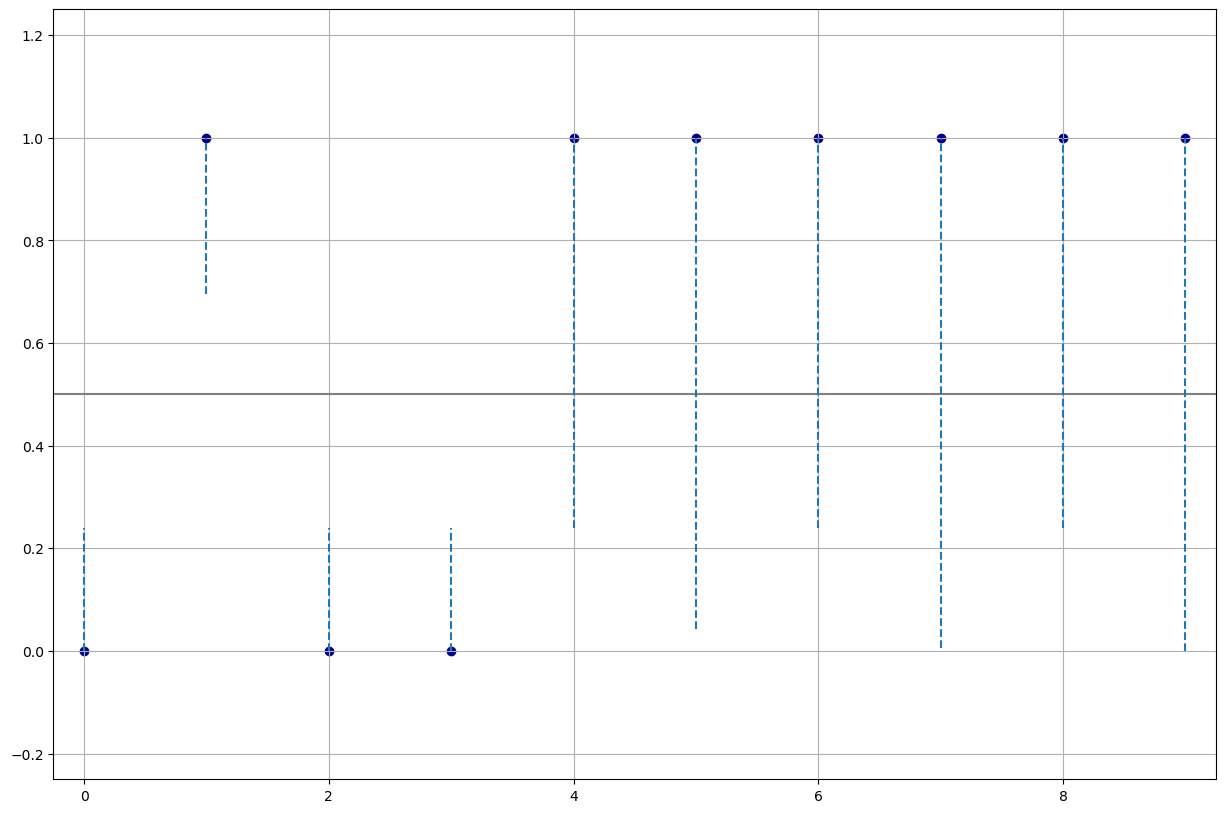

In [48]:
fig, _ = plt.subplots(figsize=(15, 10))
plt.xlim(-.25, 9.25)
plt.ylim(-.25, 1.25)
plt.scatter(X[:, 1], y, color="darkblue")
plt.axhline(.5, color=".5")
for _ in range(5, 10):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + loss[_]) / 1.5,
        ymax=(.25 + 1.) / 1.5
    )

for _ in (1, 4):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + loss[_]) / 1.5,
        ymax=(.25 + 1.) / 1.5
    )
for _ in (0, 2, 3):
    plt.axvline(
        x=_,
        linestyle="--",
        ymin=(.25 + .0) / 1.5,
        ymax=(.25 + loss[_]) / 1.5
    )

# plt.plot(X[:, 1], logit, color="red")
# plt.scatter(X[:, 1], loss, marker="D", color="red")
# plt.plot(X[:, 1], loss, color="black")
plt.grid()


In [49]:
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [50]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2022-10-28 15:58 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""